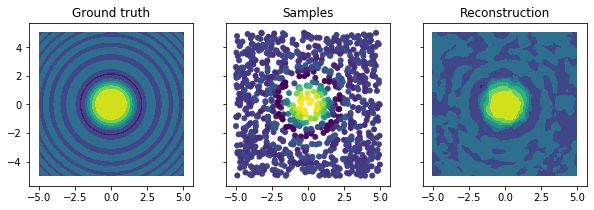

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import idw

# create sample points with structured scores
X1 = 10 * np.random.rand(1000, 2) -5

def func(x, y):
    return np.sin(x**2 + y**2) / (x**2 + y**2)

z1 = func(X1[:,0], X1[:,1])

# 'train'
idw_tree = idw.tree(X1, z1)

# 'test'
spacing = np.linspace(-5., 5., 100)
X2 = np.meshgrid(spacing, spacing)
grid_shape = X2[0].shape
X2 = np.reshape(X2, (2, -1)).T
z2 = idw_tree(X2)

# plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True, figsize=(10,3))
ax1.contourf(spacing, spacing, func(*np.meshgrid(spacing, spacing)))
ax1.set_title('Ground truth')
ax2.scatter(X1[:,0], X1[:,1], c=z1, linewidths=0)
ax2.set_title('Samples')
ax3.contourf(spacing, spacing, z2.reshape(grid_shape))
ax3.set_title('Reconstruction')
plt.show()

In [13]:
import moleculetools as mt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook

In [10]:
els, coords = mt.read_xyz("asn10.xyz")
system = mt.Structure(els, coords)
system.find_center()
system.find_axis()

Molecule instantiated!



(10000, 2)
(10000,)


<IPython.core.display.Javascript object>


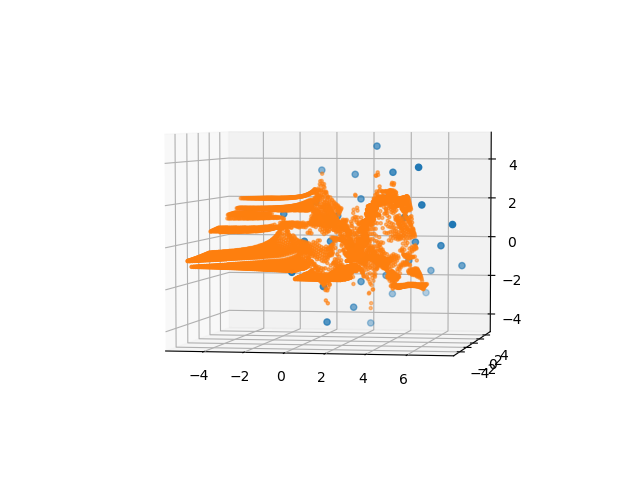

In [16]:
X1 = system.coords[:,:2]
z1 = system.coords[:,2]

# 'train'
idw_tree = idw.tree(X1, z1)

# 'test'
spacing = np.linspace(-5., 5., 100)
X2 = np.meshgrid(spacing, spacing)
grid_shape = X2[0].shape
X2 = np.reshape(X2, (2, -1)).T
z2 = idw_tree(X2)

print(X2.shape)
print(z2.shape)

# plot
#fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True, figsize=(10,3))
#ax1.contourf(spacing, spacing, func(*np.meshgrid(spacing, spacing)))
#ax1.set_title('Ground truth')
#ax2.scatter(X1[:,0], X1[:,1], c=z1, linewidths=0)
#ax2.set_title('Samples')
#ax3.contourf(spacing, spacing, z2.reshape(grid_shape))
#ax3.set_title('Reconstruction')
#plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[:,0], X1[:,1], z1, marker='o')
ax.scatter(X2[:,0], X2[:,1], z2, marker='.')